<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Capstone-Webscrapping-using-BeautifulSoup" data-toc-modified-id="Capstone-Webscrapping-using-BeautifulSoup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Capstone Webscrapping using BeautifulSoup</a></span><ul class="toc-item"><li><span><a href="#Requesting-the-Data-and-Creating-a-BeautifulSoup" data-toc-modified-id="Requesting-the-Data-and-Creating-a-BeautifulSoup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Requesting the Data and Creating a BeautifulSoup</a></span></li><li><span><a href="#Finding-the-right-key-to-scrap-the-data-&amp;-Extracting-the-right-information" data-toc-modified-id="Finding-the-right-key-to-scrap-the-data-&amp;-Extracting-the-right-information-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Finding the right key to scrap the data &amp; Extracting the right information</a></span></li><li><span><a href="#Creating-data-frame-&amp;-Data-wrangling" data-toc-modified-id="Creating-data-frame-&amp;-Data-wrangling-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Creating data frame &amp; Data wrangling</a></span></li><li><span><a href="#Finishing-This-Notebook-with-Your-Analysis-and-Conclusion" data-toc-modified-id="Finishing-This-Notebook-with-Your-Analysis-and-Conclusion-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Finishing This Notebook with Your Analysis and Conclusion</a></span><ul class="toc-item"><li><span><a href="#(Q1):-Find-the-seven-most-popular-imdb-movie-(by-imdb_rating)" data-toc-modified-id="(Q1):-Find-the-seven-most-popular-imdb-movie-(by-imdb_rating)-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span><strong>(Q1)</strong>: Find the seven most popular imdb movie (by <code>imdb_rating</code>)</a></span></li><li><span><a href="#(Q2):-Find-the-seven-most-popular-imdb-movie-(by-users_vote)" data-toc-modified-id="(Q2):-Find-the-seven-most-popular-imdb-movie-(by-users_vote)-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span><strong>(Q2)</strong>: Find the seven most popular imdb movie (by <code>users_vote</code>)</a></span></li><li><span><a href="#(Q3)-See-the-distribution-based-on-imdb_rating" data-toc-modified-id="(Q3)-See-the-distribution-based-on-imdb_rating-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span><strong>(Q3)</strong> See the distribution based on <code>imdb_rating</code></a></span></li><li><span><a href="#(Q4)-See-the-distribution-based-on-users_vote" data-toc-modified-id="(Q4)-See-the-distribution-based-on-users_vote-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span><strong>(Q4)</strong> See the distribution based on <code>users_vote</code></a></span></li></ul></li><li><span><a href="#Dashboard" data-toc-modified-id="Dashboard-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Dashboard</a></span></li></ul></li></ul></div>

# Capstone Webscrapping using BeautifulSoup

As prerequisite for my bootcamp program, i decided to pick webscraping as my capstone project. The task is implement web scrap, analyze the data, and get the insight from it.

For this topic i choose [IMDb](https://www.imdb.com), one of the the most pupular  online database of information related to films, television programs, home videos, video games, and streaming content online including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. 

I will scrap [single web page from IMDb](https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31) contains list movies that has released between Jan 1st, 2019 - Dec 31st, 2019 sort by the most popular. 
<img src="imdb_screenshot1.png">
For web scrap i use BeautifulSoup - *a Python library for pulling data out of HTML and XML files*. 

After that i use Pandas and Matplotlib for analyze and visualize the data. Finally i create dashboard to display the insight data using Flask. Basically i combine the web scrap topic and data visualisation task  into this project.

Through this notebook i will explain the stpes from the scrap until the the visualisation process. 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [3]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [4]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t)'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [5]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [6]:
container_list = soup.find('div', attrs={'class':'lister-list'})
print(container_list.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8111088">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt8111088/">
    <img alt="The Mandalorian" class="loadlate" data-tconst="tt8111088" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZDhlMzY0ZGItZTcyNS00ZTAxLWIyMmYtZGQ2ODg5OWZiYmJkXkEyXkFqcGdeQXVyODkzNTgxMDg@._V1_UX67_CR0,0,6


Do the scrapping process here (please change this markdown with your explanation)

In [7]:
#import re

#1. find the container list in <div>
movielist = container_list.find_all('div', attrs={'class':'lister-item mode-advanced'})
len(movielist)
#movielist
#type(movielist)

#2. Grab the title in <h3> nested in step(1)
temp_movieset = []
titles = []
imdbratings = []
votes = []
metascores = []

for movie in movielist:
    #get titles
    titles = movie.find('div', attrs={'class':'lister-item-content'})\
            .find('h3', attrs={'class':'lister-item-header'})\
            .find('a').text.strip()
    
    #get imdb rating
    imdbratings = movie.find('div', attrs={'class':'lister-item-content'})\
                    .find('div', attrs={'class':'ratings-bar'})\
                    .find('strong').text.strip()                    
    
    #get user's votes
    #vote = container.find('span', attrs = {'name':'nv'})['data-value']
    votes = movie.find('div', attrs={'class':'lister-item-content'})\
            .find('p', attrs={'class':'sort-num_votes-visible'})\
            .find('span', attrs={'name':'nv'}).text.strip()
            #.find('span', attrs={'name':'nv'})['data-value']
    
    #get metascore
    if (movie.find('div', attrs={'class':'lister-item-content'})\
                    .find('div', attrs={'class':'ratings-bar'})\
                    .find('div', attrs={'class':'inline-block ratings-metascore'})) is None:
        metascores = "<blank>"
    else:
        metascores = movie.find('div', attrs={'class':'lister-item-content'})\
                    .find('div', attrs={'class':'ratings-bar'})\
                    .find('div', attrs={'class':'inline-block ratings-metascore'}).contents[1]\
                    .contents[0]
                    #.find('span')#stript.strip()
                    #.find('span', class_=re.compile("metascore"))#.text.strip()
                    
        
    #temp_movieset.append((titles, float(imdbratings), int(votes), metascores))
    temp_movieset.append((titles, imdbratings, votes, metascores))
    
temp_movieset

[('The Mandalorian', '8.7', '221,588', '<blank>'),
 ('The Boys', '8.7', '218,789', '<blank>'),
 ('His Dark Materials', '7.9', '42,536', '<blank>'),
 ('Virgin River', '7.5', '12,605', '<blank>'),
 ('Mosul', '7.3', '10,824', '<blank>'),
 ('Knives Out', '7.9', '420,830', '82        '),
 ('The Witcher', '8.2', '283,050', '<blank>'),
 ('The Gentlemen', '7.8', '208,560', '51        '),
 ('1917', '8.3', '394,659', '78        '),
 ('Once Upon a Time... in Hollywood', '7.6', '531,618', '83        '),
 ('Euphoria', '8.4', '53,838', '<blank>'),
 ('Jojo Rabbit', '7.9', '279,166', '58        '),
 ('Buddy Games', '5.0', '728', '22        '),
 ('Gisaengchung', '8.6', '513,722', '96        '),
 ('Avengers: Endgame', '8.4', '783,374', '78        '),
 ('Joker', '8.5', '901,863', '59        '),
 ('Bombshell', '6.8', '80,287', '64        '),
 ('Last Christmas', '6.5', '42,772', '50        '),
 ('Star Wars: Episode IX - The Rise of Skywalker',
  '6.6',
  '359,729',
  '53        '),
 ('Wayne', '8.4', '8,638

since the are several movies that has no data _'metascore'_, so we will remove from our dataset

## Creating data frame & Data wrangling

Put the array into dataframe

In [8]:
import pandas as pd

df = pd.DataFrame(temp_movieset, columns=('title', 'imdb_rating', 'users_vote', 'metascore'))
df.head()

,title,imdb_rating,users_vote,metascore
0,The Mandalorian,8.7,"221,588",<blank>
1,The Boys,8.7,"218,789",<blank>
2,His Dark Materials,7.9,"42,536",<blank>
3,Virgin River,7.5,"12,605",<blank>
4,Mosul,7.3,"10,824",<blank>


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [9]:
df.dtypes

title          object
imdb_rating    object
users_vote     object
metascore      object
dtype: object

In [10]:
type(df['imdb_rating'][0])

str

In [11]:
type(df['users_vote'][0])

str

- convert `imdb_rating` data type from `string` to `float`
- convert `users_vote` data type from `string` to `int`

In [12]:
df['imdb_rating'] = df['imdb_rating'].astype('float64')
type(df['imdb_rating'][0])

numpy.float64

In [13]:
df['users_vote'] = df['users_vote'].str.replace(',','')
df['users_vote'] = df['users_vote'].astype('int')
type(df['users_vote'][0])

numpy.int32

Because several movies in datasets has not `metascore` value, we will drop `metascore` from out dataframe and use `imdb score` and `users vote` fo the data analysis

In [14]:
df.drop('metascore', inplace=True, axis=1)
df.dtypes

title           object
imdb_rating    float64
users_vote       int32
dtype: object

set `Title` as dataframe index

In [15]:
df = df.set_index('title')
df.head()

,imdb_rating,users_vote
title,,
The Mandalorian,8.7,221588
The Boys,8.7,218789
His Dark Materials,7.9,42536
Virgin River,7.5,12605
Mosul,7.3,10824


<!-- ### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`
-->

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

### **(Q1)**: Find the seven most popular imdb movie (by `imdb_rating`)

<ipython-input-16-415129cd0bb8>:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(x_axis, y_axis, color='crgbkym')


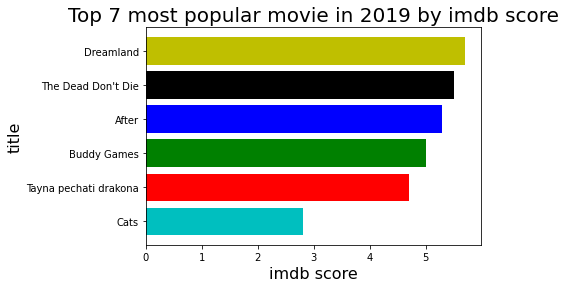

In [16]:
#stock.stack().reset_index().pivot_table(index = 'Symbols',values = 'Volume').sort_values('Volume').plot.barh()
import matplotlib.pyplot as plt
import numpy as np

topseven_by_imdbrating = df.sort_values('imdb_rating')['imdb_rating'].head(6).reset_index()
x_axis = topseven_by_imdbrating['title']
y_axis = topseven_by_imdbrating['imdb_rating']

plt.barh(x_axis, y_axis, color='crgbkym')
plt.xlabel('imdb score', fontsize=16)
plt.ylabel('title', fontsize=16)
plt.title('Top 7 most popular movie in 2019 by imdb score',fontsize=20)
plt.show()

### **(Q2)**: Find the seven most popular imdb movie (by `users_vote`)

<ipython-input-17-cfd2283e4cd9>:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(x_axis, y_axis, color='crgbkym')


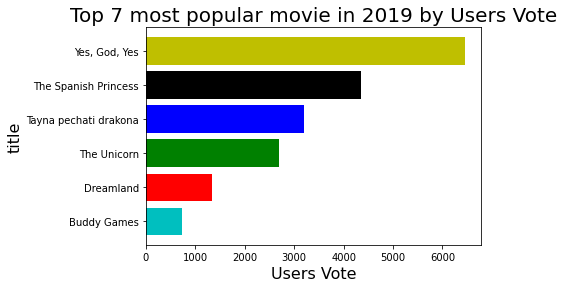

In [17]:
#df.sort_values(by='users_vote', ascending=True)['users_vote'].head(6).plot(kind='barh')

topseven_by_usersvote = df.sort_values('users_vote')['users_vote'].head(6).reset_index()
topseven_by_usersvote
x_axis = topseven_by_usersvote['title']
y_axis = topseven_by_usersvote['users_vote']

plt.barh(x_axis, y_axis, color='crgbkym')
plt.xlabel('Users Vote', fontsize=16)
plt.ylabel('title', fontsize=16)
plt.title('Top 7 most popular movie in 2019 by Users Vote',fontsize=20)
plt.show()

In [18]:
df_mostvotes = df.reset_index().sort_values('users_vote', ascending = False)\
                [['title', 'users_vote']]
#df_mostvotes.shape
df_mostvotes.head()#['imdb_rating'].head(1)#['title']

,title,users_vote
15,Joker,901863
14,Avengers: Endgame,783374
9,Once Upon a Time... in Hollywood,531618
23,Chernobyl,514500
13,Gisaengchung,513722


In [19]:
#get value of highest user vote
top_vote_value =  df_mostvotes['users_vote'].head(1)
top_vote_value
#type(top_vote_value)

15    901863
Name: users_vote, dtype: int32

In [20]:
#get top movies w/ highest number of user vote
top_vote_movie =  df_mostvotes['title'].head(1)
top_vote_movie

15    Joker
Name: title, dtype: object

### **(Q3)** See the distribution based on `imdb_rating`

In [21]:
#1. create the `imdb_rating` frequencies data
df2 = df.reset_index()['imdb_rating'].value_counts()
df2
#df3 = pd.DataFrame(df2, columns=('freq', 'count'))
#df3

7.9    6
8.4    4
7.6    4
8.2    3
8.7    2
6.8    2
7.3    2
8.1    2
7.5    2
7.8    2
8.3    2
6.3    1
5.0    1
8.5    1
6.5    1
5.5    1
5.7    1
6.2    1
5.3    1
7.4    1
6.7    1
6.1    1
7.2    1
9.4    1
8.6    1
6.6    1
4.7    1
7.1    1
2.8    1
7.7    1
Name: imdb_rating, dtype: int64

In [22]:
#2. see the imdb_rating basic stats.
df.reset_index()['imdb_rating'].describe()

count    50.000000
mean      7.366000
std       1.219336
min       2.800000
25%       6.800000
50%       7.650000
75%       8.200000
max       9.400000
Name: imdb_rating, dtype: float64

Among this dataset (50 movies), the average `imdb rating` is 7.36 , while the std.deviation is 1.22

<AxesSubplot:>

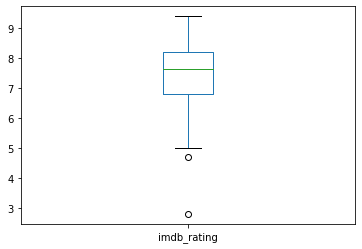

In [23]:
df.reset_index()['imdb_rating'].plot.box()

- based on the box plot diagram, the distribution of data (`imdb rating`) is mostly in the range of 6.8 to 7.2 with data averages 7.4
-  there's an outlier `imdb rating` (2.8) that is far from the lower iqr.

In [24]:
df['imdb_rating'].skew()

-1.4972214820600838

(array([ 1.,  0.,  1.,  2.,  2.,  6.,  7., 15., 15.,  1.]),
 array([2.8 , 3.46, 4.12, 4.78, 5.44, 6.1 , 6.76, 7.42, 8.08, 8.74, 9.4 ]),
 <BarContainer object of 10 artists>)

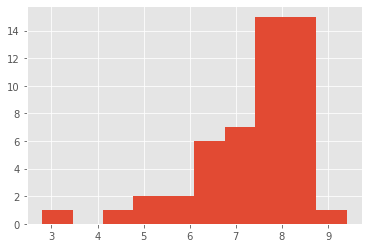

In [25]:
plt.style.use('ggplot')
#plt.hist(df.reset_index()['imdb_rating'], bins = 10, range = (0,10))
plt.hist(df.reset_index()['imdb_rating'])
#plt.set_title('IMDb Rating distribution')

- the `imdb rating` data has negative skew, which means the more data lie below the mean (as shown in histogram plot) 

### **(Q4)** See the distribution based on `users_vote`

In [26]:
#1. create the `users_vote` frequencies data
df4= df.reset_index()['users_vote'].value_counts()
df4

279166    1
531618    1
210614    1
180149    1
275633    1
208560    1
144557    1
283050    1
42536     1
221588    1
218789    1
394659    1
133618    1
3196      1
80287     1
45979     1
60951     1
42772     1
35219     1
1329      1
783374    1
12168     1
53126     1
2691      1
13367     1
513722    1
50620     1
12605     1
39418     1
314873    1
136219    1
32370     1
10858     1
80873     1
901863    1
359729    1
420830    1
86234     1
728       1
4345      1
9551      1
53838     1
6454      1
191422    1
10824     1
149317    1
514500    1
73409     1
8638      1
132994    1
Name: users_vote, dtype: int64

In [27]:
#2. see the imdb_rating basic stats.
df.reset_index()['users_vote'].describe()

count        50.000000
mean     167504.600000
std      203559.675392
min         728.000000
25%       18117.750000
50%       80580.000000
75%      220888.250000
max      901863.000000
Name: users_vote, dtype: float64

Among this dataset (50 movies), the average `users vote` is 167,492.32, while the std.deviation is 203,554.56

<AxesSubplot:>

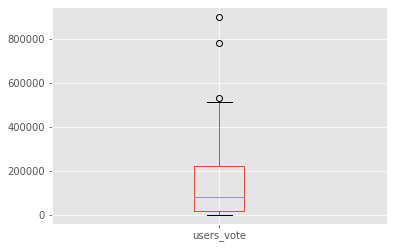

In [28]:
df.reset_index()['users_vote'].plot.box()

- based on the box plot diagram, the distribution of data (`imdb rating`) is mostly in the range of 18,114 to 22,0847 with data averages (mean) 167,492.32
- there're 3 outlier `user data` data  that is fhigher than the upper inner fence.

In [29]:
df['users_vote'].skew()

1.8386592221144618

(array([27.,  6.,  5.,  5.,  2.,  3.,  0.,  0.,  1.,  1.]),
 array([7.280000e+02, 9.084150e+04, 1.809550e+05, 2.710685e+05,
        3.611820e+05, 4.512955e+05, 5.414090e+05, 6.315225e+05,
        7.216360e+05, 8.117495e+05, 9.018630e+05]),
 <BarContainer object of 10 artists>)

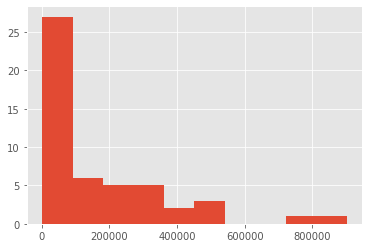

In [30]:
plt.style.use('ggplot')
#plt.hist(df.reset_index()['users_vote'], bins = 10, range = (0,10))
plt.hist(df.reset_index()['users_vote'])
#plt.set_title('imdb user vote Rating distribution')

- the `user vote` data has positive skew, which means the more data lie above the means (as shown in histogram plot)

## Dashboard

After all, the plots above is display in a web dashboard using Flask.
<img src="full_capstone.png">